# Kalman Filter
- Linear ODE
- Gaussian Measurement Noise
- Regularly sample in time

In [68]:
import numpy as np
from scipy.integrate import solve_ivp

import matplotlib.pyplot as plt


## Generate Data

Data shape: (3, 50)


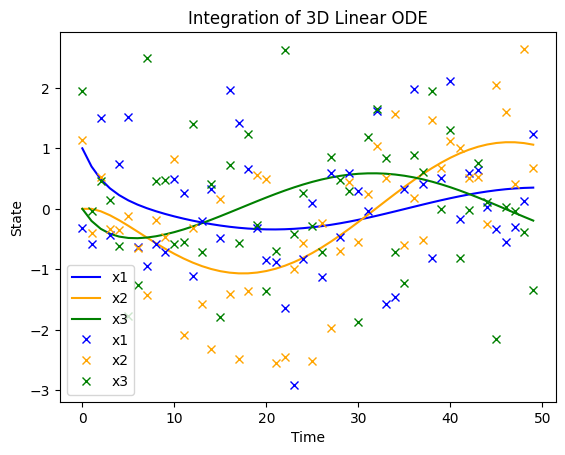

In [69]:
# Define the linear ODE: dx/dt = A x, where x is 3D
A = np.array([[0.7, 0.1, 0.0],
              [0.0, 1.0, 0.2],
              [-0.2, 0.0, 0.95]])

sigma_x = 1.0 # Standard deviation for Gaussian noise

def linear_ode(t, x):
    return A @ x

# Initial condition
x0 = np.array([1.0, 0.0, 0.0])

## Integrate the ODE (continuous time) - Careful with A, need to change to not blow up 
# Time span
# t_span = (0, 10)
# t_eval = np.linspace(*t_span, 200)

# # Integrate 
# sol = solve_ivp(linear_ode, t_span, x0, t_eval=t_eval)
# truth_t = sol.t
# truth_x = sol.y


## Integrate the ODE (discrete time)
N=50
truth_t = np.array(range(0, N))
truth_x = np.zeros((3, N))  # 3D state vector
truth_x[:,0] = x0  # Initial condition

for i in range(1, N):
    # Discrete time integration
    truth_x[:,i] = linear_ode(truth_t[i-1], truth_x[:,i-1])

data_t = truth_t
data_x = truth_x + np.random.normal(0, sigma_x, truth_x.shape)  # Adding Gaussian noise
print("Data shape:", data_x.shape)

# Plot the ODE solution
plt.plot(truth_t, truth_x[0,:], label='x1',color='blue')
plt.plot(truth_t, truth_x[1,:], label='x2',color='orange')
plt.plot(truth_t, truth_x[2,:], label='x3',color='green')
plt.plot(data_t, data_x[0,:], label='x1', marker='x', linestyle='None',color='blue')
plt.plot(data_t, data_x[1,:], label='x2', marker='x', linestyle='None',color='orange')
plt.plot(data_t, data_x[2,:], label='x3', marker='x', linestyle='None',color='green')
plt.xlabel('Time')
plt.ylabel('State')
plt.legend()
plt.title('Integration of 3D Linear ODE')
plt.show()



## Parameter Estimation by Kalman Filter

In [70]:
Q = np.zeros((3, 3))
H = np.eye(3)  # Measurement matrix
R = np.eye(3) * sigma_x**2  # Measurement noise covariance

In [71]:
x_est = np.zeros(data_x.shape)  # Estimated state vector
# Guess the initial state vector and covariance:
i = 0
x = np.linalg.inv(H) @ data_x[:,i]  
P = np.linalg.inv(H) @ R @ np.linalg.inv(H.T)

x_est[:,i] = x
for i in range(1, data_t.shape[0]):
    # This is the code which implements the discrete Kalman filter:

    # Prediction for state vector and covariance:
    x = A @ x 
    P = A @ P @ A.T + Q

    # Compute Kalman gain factor:
    K = P @ H.T @ np.linalg.inv(H @ P @ H.T + R)

    # Correction based on observation:
    x = x + K @ (data_x[:, i] - H @ x)
    P = P - K @ H @ P

    # Save the results:
    x_est[:,i] = x


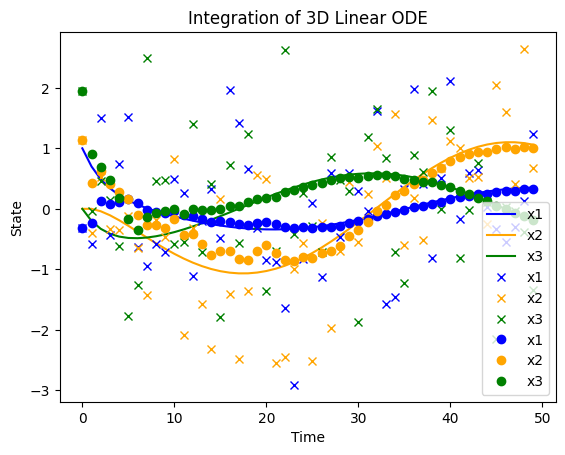

In [72]:
# Plot the ODE solution
plt.plot(truth_t, truth_x[0,:], label='x1',color='blue')
plt.plot(truth_t, truth_x[1,:], label='x2',color='orange')
plt.plot(truth_t, truth_x[2,:], label='x3',color='green')
plt.plot(data_t, data_x[0,:], label='x1', marker='x', linestyle='None',color='blue')
plt.plot(data_t, data_x[1,:], label='x2', marker='x', linestyle='None',color='orange')
plt.plot(data_t, data_x[2,:], label='x3', marker='x', linestyle='None',color='green')
plt.plot(data_t, x_est[0,:], label='x1', marker='o', linestyle='None',color='blue')
plt.plot(data_t, x_est[1,:], label='x2', marker='o', linestyle='None',color='orange')
plt.plot(data_t, x_est[2,:], label='x3', marker='o', linestyle='None',color='green')
plt.xlabel('Time')
plt.ylabel('State')
plt.legend()
plt.title('Integration of 3D Linear ODE')
plt.show()